In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Мы знаем, что сопряженным к Bern(p) является $Beta(\alpha, \beta)$, где  $\alpha и \beta$ априорны параметры. Апостериорными гиперпараметрами будут: $\alpha + \sum_{i=1}^n X_i, \beta + n - \sum_{i=1}^n X_i$. Тогда зная, что математическое ожидание случайной величины, распределенной как $Beta(\alpha, \beta)$, равно $\frac{\alpha}{\alpha + \beta}$, легко найдем байесовскую оценку: $\hat{\theta} = E(\theta|X) = \frac{\alpha + \sum_{i=1}^n X_i}{\alpha + \beta + n}$. Запишем различные примеры сопряженных к Бернуллиевскому распределений:

In [2]:
beta_distr = []
beta_distr.append(sps.beta(1, 100))
beta_distr.append(sps.beta(0.5, 0.5))
beta_distr.append(sps.beta(1, 3))
beta_distr.append(sps.beta(2, 2))
beta_distr.append(sps.beta(2, 5))
beta_distr.append(sps.beta(5, 1))
beta_distr.append(sps.beta(10, 10))
beta_distr.append(sps.beta(100, 1))

In [3]:
beta_parametrs = [[1, 100], [0.5,0.5], [1,3], [2,2], [2,5], [5,1], [10,10], [100,1]]

Теперь нарисуем графики плотностей. Сначала рисуем для каждого распределения по отдельности:

In [4]:
xs = np.linspace(0, 1, 2000) #  точки для графика

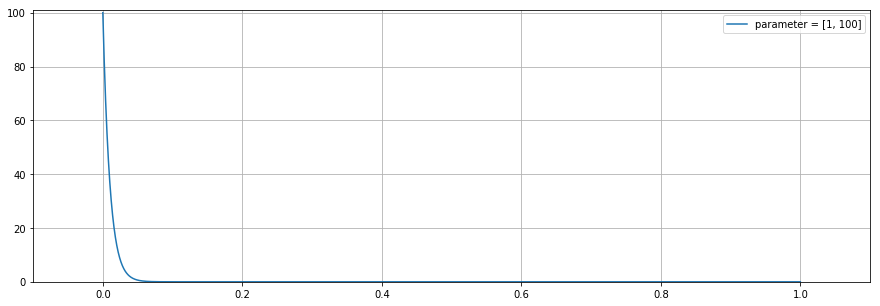

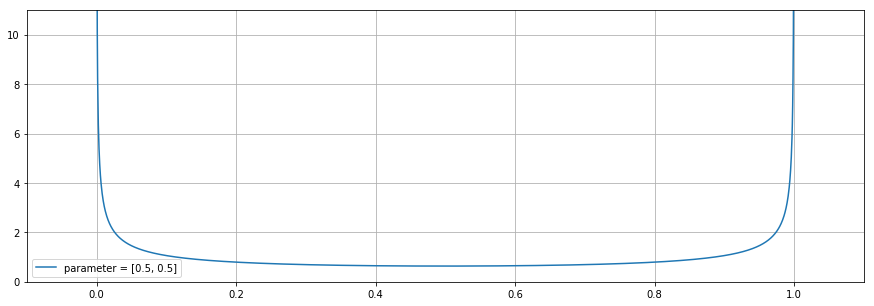

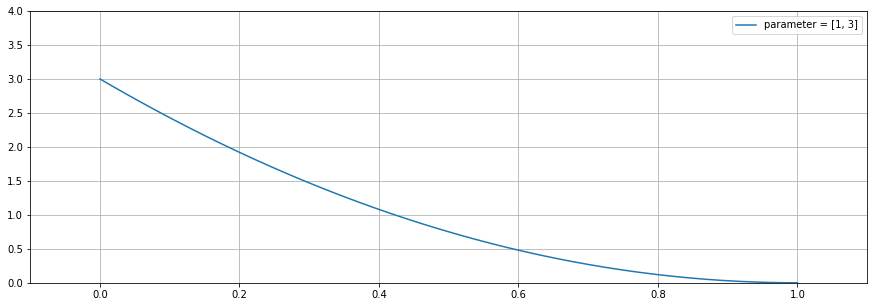

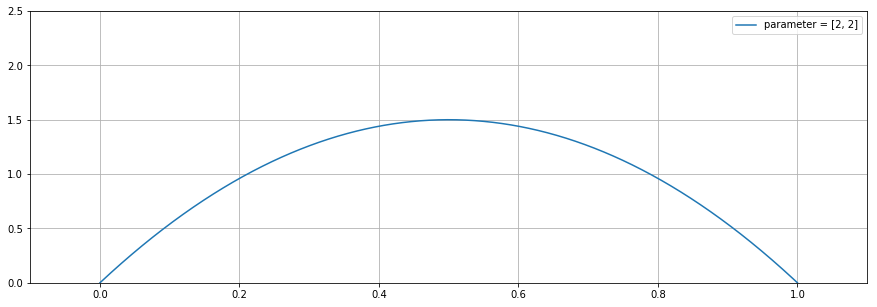

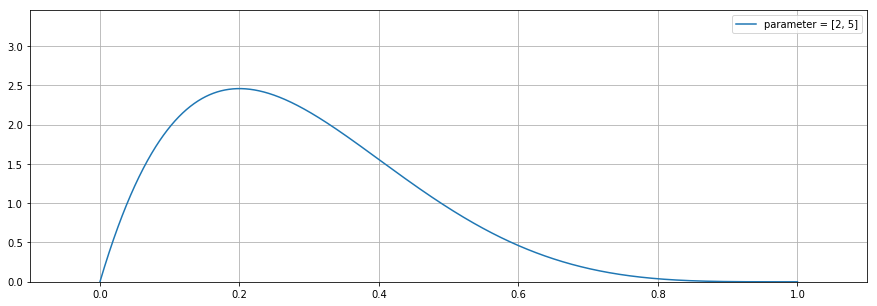

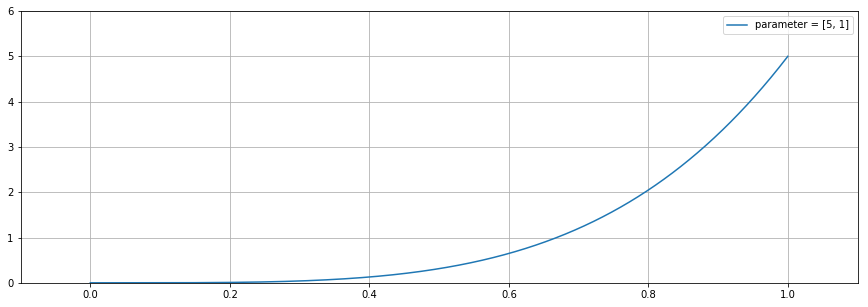

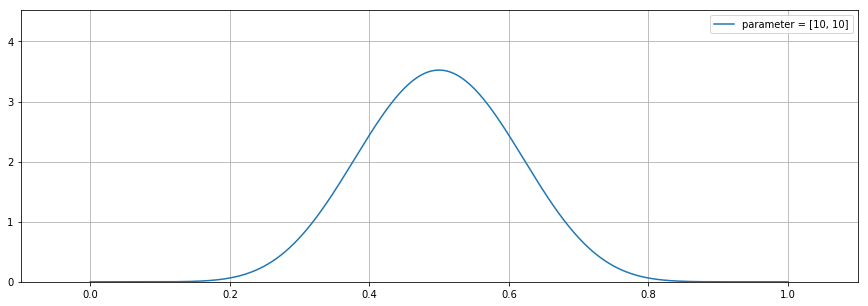

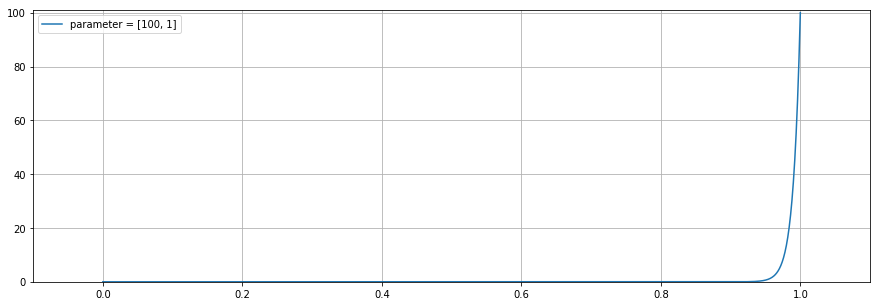

In [5]:
i = 0
for distribution in beta_distr:
    ys = [distribution.pdf(x) for x in xs]
    lim_y = np.max(ys)
    if(lim_y == np.inf) :
        lim_y = 10
    
    plt.figure(figsize=(15,5))
    plt.plot(xs, ys, label='parameter = ' + str(beta_parametrs[i]))
    plt.xlim(-0.1, 1.1)
    plt.ylim(0, lim_y + 1)
    plt.grid(True)
    plt.legend()
    plt.show()
    i = i + 1

Теперь для наглядности нарисуем все графики на одном:

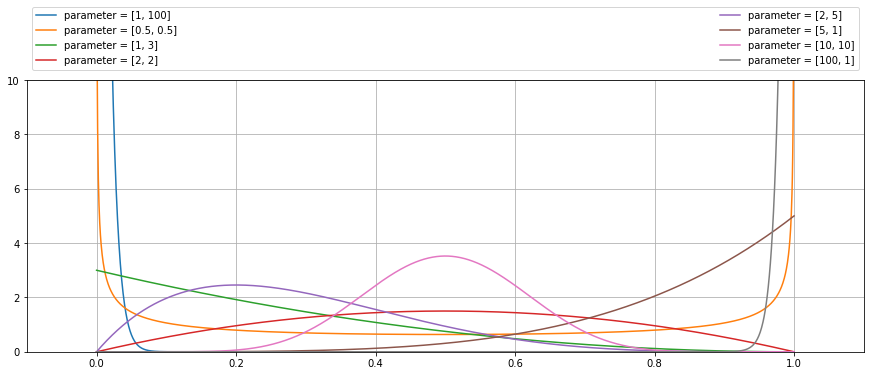

In [6]:
i = 0
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(0,10)
for distribution in beta_distr:
    ys = [distribution.pdf(x) for x in xs]
    plt.plot(xs, ys, label='parameter = ' + str(beta_parametrs[i]))
    if(lim_y == np.inf) :
        lim_y = 10
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")
    i = i + 1

Зададим набор распределений Бернулли с различными значениями параметра $\theta$:

In [7]:
thetas = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
bernoulli_distr = []
for theta in thetas:
    bernoulli_distr.append(sps.bernoulli(theta))

Для каждого из этих распределений генерируем выборку размера 20:

In [8]:
samples = []
for distr in bernoulli_distr:
    samples.append(distr.rvs(20))

Теперь задаём функцию, которая возвращает байесовскую оценку в зависимости от различных параметров априорного распределения и выборки:

In [9]:
def bayesian_eval(alpha, beta, sums):
    return [(float(alpha) + sums[n]) / (float(alpha) + float(beta) + float(n + 1)) for n in range(len(sums))]

Определим также функцию, которая строит графики в зависимости от оценки:

In [10]:
def draw_evals(evaluations):
    plt.figure(figsize=(15,5))
    for i in range(len(evaluations)):
        plt.plot(range(1, 21), evaluations[i],label= 'param = ' + str(beta_parametrs[i]))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")
    plt.grid(True)

Напишем функцию, которая вычисляет все оценки для всех параметров априорного распределения. Далее нарисуем график разности с $\theta$ и посмотрим, какой из параметров лучше. Так же добавим оценку максимального правдоподобия, равную выборочному среднему $\bar{X}$:

In [13]:
def make_all_evals(sample):
    all_evals = []
    for i in range(len(sample)):
        to_append = []
        for parametr in beta_parametrs:
            to_append.append(bayesian_eval(parametr[0], parametr[1], np.cumsum(sample[i])))
        all_evals.append(to_append)
    return all_evals

In [14]:
all_evals = make_all_evals(samples)

А эта функция построит нам ОМП и байесовские оценки для различных значений $\theta$ в зависимости от параметров априорного распределения:

In [25]:
def draw_all_evals(evals):
    MLE = [] # оценка максимального правдоподобия
    for k in range(len(samples)):
        cumulative_sum = np.cumsum(samples[k])       
        MLE.append([cumulative_sum[x] / float(x + 1.) for x in range(len(cumulative_sum))])
    for j in range(len(evals)):
        plt.figure(figsize=(15,5))
        plt.plot(range(1,21), MLE[j], '--', label='MLE')
        for i in range(len(evals[j])):
            ys = np.array(evals[j][i])
            plt.plot(range(1, 21), ys, label= 'param = ' + str(beta_parametrs[i]))
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")
        plt.grid(True)
        xlabel_str = 'For $\\theta$ = ' + str(thetas[j])
        plt.xlabel(xlabel_str)
        plt.show()

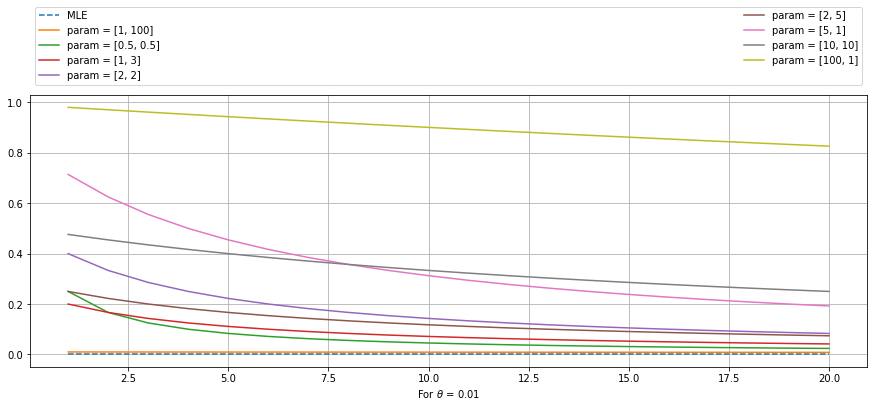

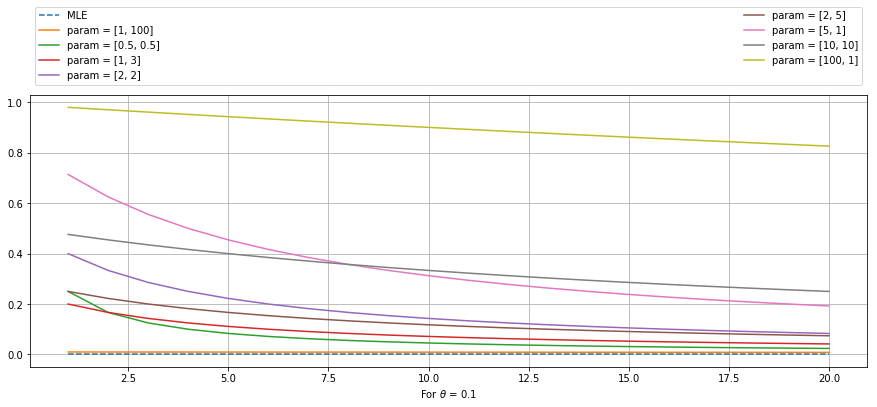

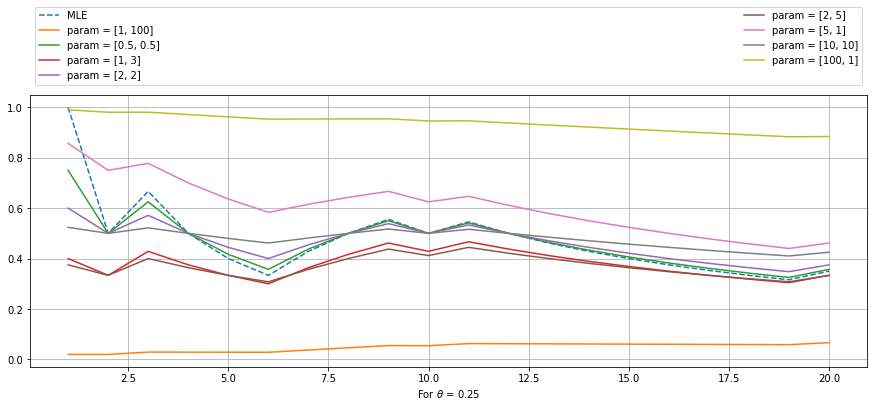

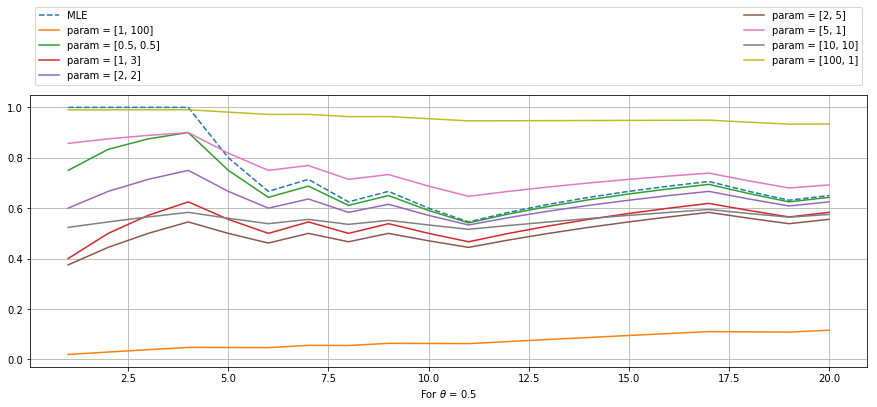

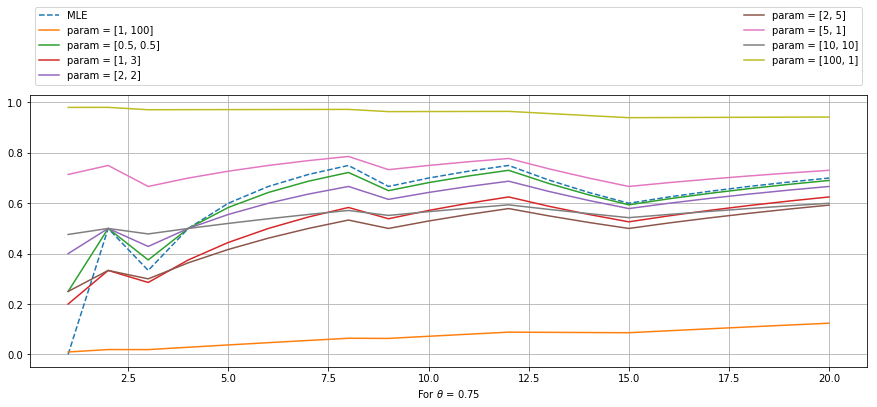

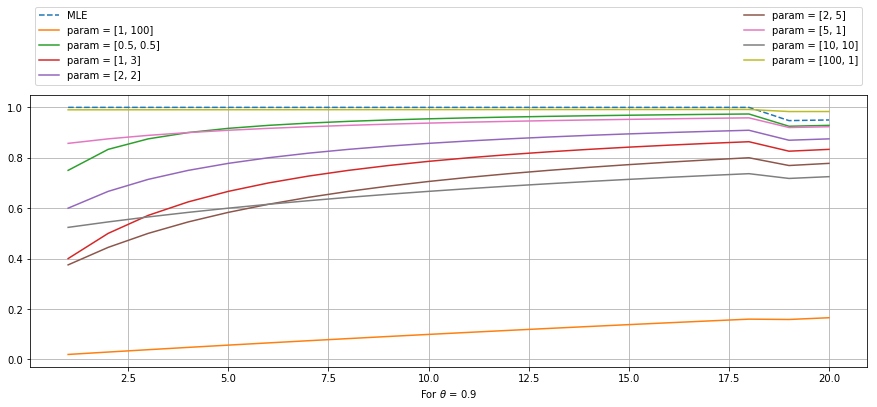

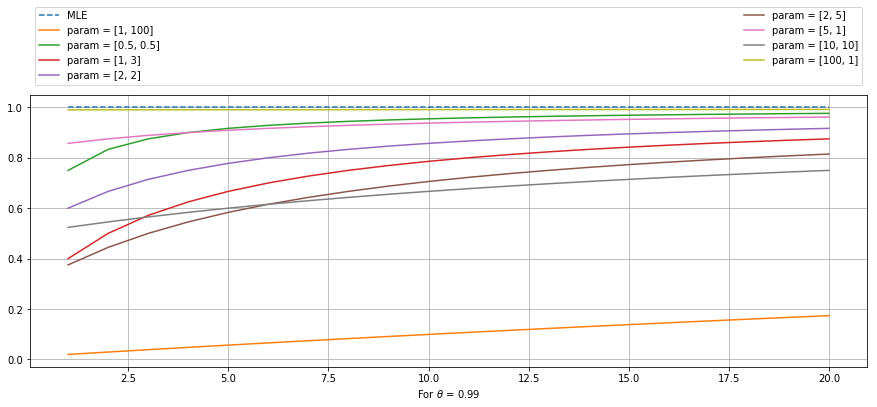

In [26]:
draw_all_evals(all_evals)

Про бернуллиевскую с вероятностью 0.5 сложно что-то сказать, т.к монетка может быть как честной, так и часто давать перевес в одну из сторону. например Beta(10,10) и Beta(0.5,0.5). Для каждого из изначальных параметров $\theta$ в бернуллиевской модели хорошо работают различные параметры для априорного распределения, например, для тех случаев, когда $\theta$ близко к единице или нулю, подойдут такие параметры априорного, график плотности которых имеет выраженные максимумы в точке 1 и 0.